# 다변량 통계 과제 2
- 12171676 컴퓨터공학과 이종법
- 언어 : python

In [225]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import sys

import scipy.stats as stats # qqplot에 사용

In [2]:
#시각화 패키지들
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

# 문제 1.

x1:석유, x2: 천연가스, x3:수력 발전, x4:원자력 발전 의 에너지 소비량의 표본 평균과 표본 공분산이다.

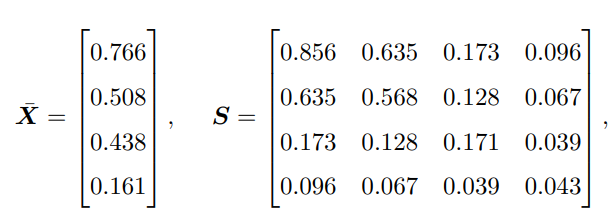

In [25]:
x_bar = np.array([[0.766],
                  [0.508],
                  [0.438],
                  [0.161]])
S = np.array([[0.856,0.635,0.173,0.096],
             [0.635,0.568,0.128,0.067],
             [0.173,0.128,0.171,0.039],
             [0.096,0.067,0.039,0.043]])

## 1 - a)
X1+X2+X3+X4의 표본평균과 표본분산
- E(X1+X2+X3+X4)=E(X1)+E(X2)+E(X3)+E(X4)
- VAR(X1+X2+X3+X4) = COV(X1+X2+X3+X4, X1+X2+X3+X4) = SUM(공분산 행렬)

In [53]:
x_all_mean = x_bar.T @ np.array([1,1,1,1])
print("표본평균 : ", x_all_mean)

표본평균 :  [1.873]


In [54]:
x_all_var=np.array([1,1,1,1]) @ S @ np.array([1,1,1,1])
print("표본분산 : ",x_all_var)


표본분산 :  3.914


## 1 - b)
X1-X2의 표본평균과 표본분산
- E(X1-X2) = E(X1)-E(X2)
- VAR(X1-X2) = VAR(X1)+VAR(X2)-2COV(X1,X2)

In [55]:
x_diff_mean = x_bar.T @ np.array([1,-1,0,0])
print("표본평균 : ", x_diff_mean)

표본평균 :  [0.258]


In [56]:
x_diff_var=np.array([1,-1,0,0]) @ S @ np.array([1,-1,0,0])
print("표본분산 : {:.4f}".format(x_diff_var))


표본분산 : 0.1540


## 1 - c)
(X1+X2+X3+X4)과 (X1-X2)의 표본공분산(행렬) 구하기
- COV(X1+X2+X3+X4,X1-X2) = {VAR(X1)+COV(X2,X1)+COV(X3,X1)+COV(X4,X1)} - {COV(X1,X2)+VAR(X2)+COV(X3,X2)+COV(X4,X2)}
- 공분산은 공분산행렬S에서 1열 - 2열 한것의 결과와 같다,

In [64]:
cov_of_pair = S @ np.array([1,-1,0,0]) @np.array([1,1,1,1])
cov_matirix_pair = np.array([[x_all_var,cov_of_pair],
                            [cov_of_pair,x_diff_var]])
print("공분산 행렬 : \n",cov_matirix_pair)

공분산 행렬 : 
 [[3.914 0.362]
 [0.362 0.154]]


# 문제 2.

아래의 평균과 공분산을 갖는 이변량 정규분포의 n=1000 랜덤 표본 추출
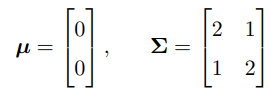



## 2 - a). 
n=1000, rep=1000 xbar 와 S를 구해서 히스토그램과 수치로 비교



In [113]:
bivariate_norm_mean= np.array([0,0])
bivariate_norm_cov= np.array([[2,1],[1,2]])
bivariate_norm_cov

array([[2, 1],
       [1, 2]])

In [142]:
np.stack([np.cov(x1,x2),np.cov(x1,x2),np.cov(x1,x2),np.cov(x1,x2)])[:,0,0]

array([2.36427718, 2.36427718, 2.36427718, 2.36427718])

In [144]:
x1_means=[]
x2_means=[]

all_cov=[]

for nums in range(1000):
    x1,x2=np.random.multivariate_normal(bivariate_norm_mean,bivariate_norm_cov,1000).T
    x1_means.append(np.mean(x1))
    x2_means.append(np.mean(x2))
    
    all_cov.append(np.cov(x1,x2))
all_cov=np.stack(all_cov)

x1의 평균 :  0.002004897339473411
x2의 평균 :  0.0008866986650858212


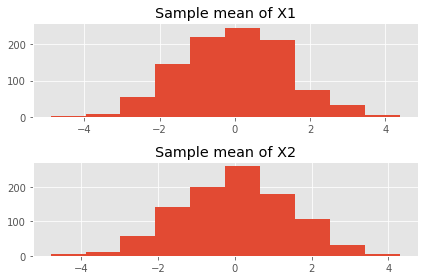

In [145]:
print('x1의 평균 : ',np.mean(x1_means))
print('x2의 평균 : ',np.mean(x2_means))

plt.subplot(2,1,1)

plt.title("Sample mean of X1")
plt.hist(x1)

plt.subplot(2,1,2)
plt.title("Sample mean of X2")
plt.hist(x2)

plt.tight_layout()

S11 :  1.996653232770947
S12 :  0.9970238842444674
S21 :  0.9970238842444674
S22 :  1.9986437551327636


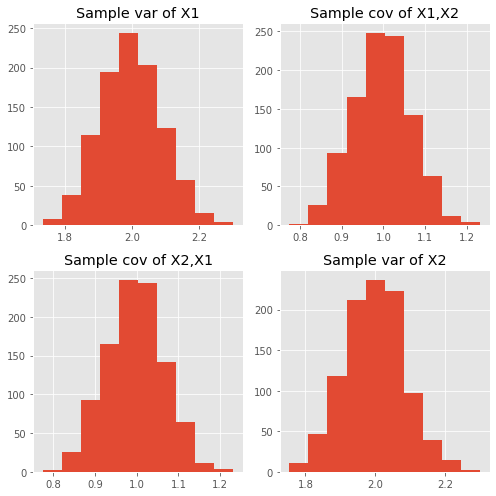

In [154]:
print("S11 : ",np.mean(all_cov[:,0,0]))
print("S12 : ",np.mean(all_cov[:,0,1]))
print("S21 : ",np.mean(all_cov[:,1,0]))
print("S22 : ",np.mean(all_cov[:,1,1]))

plt.figure(figsize=(7,7))
plt.subplot(2,2,1)

plt.title("Sample var of X1")
plt.hist(all_cov[:,0,0])

plt.subplot(2,2,2)
plt.title("Sample cov of X1,X2")
plt.hist(all_cov[:,0,1])

plt.subplot(2,2,3)
plt.title("Sample cov of X2,X1")
plt.hist(all_cov[:,1,0])

plt.subplot(2,2,4)
plt.title("Sample var of X2")
plt.hist(all_cov[:,1,1])

plt.tight_layout()

## 2 - b)

n=1000 표본에서 1000개의 |S| 와 tr(S)의 히스토그램 그리고, 평균을 나타내기

In [162]:
all_cov.shape

(1000, 2, 2)

In [174]:
all_cov_det=np.linalg.det(all_cov)
all_cov_trace=np.trace(all_cov,axis1=1,axis2=2)

Mean of sample det :  2.993990140552404
Mean of sample trace :  3.99529698790371


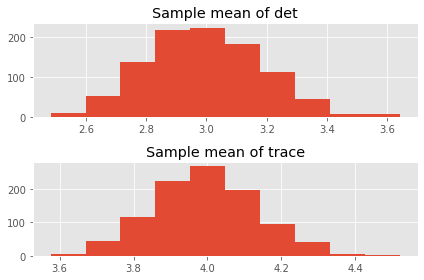

In [177]:
print("Mean of sample det : ",np.mean(all_cov_det))
print("Mean of sample trace : ",np.mean(all_cov_trace))

plt.subplot(2,1,1)

plt.title("Sample mean of det")
plt.hist(all_cov_det)

plt.subplot(2,1,2)
plt.title("Sample mean of trace")
plt.hist(all_cov_trace)

plt.tight_layout()


실제 determinant : 3, trace : 4로, 거의 일치한 수치를 얻을 수 있다.

## 2 - c) 

1000개 표본, 1000 rep 에서 S의 leading eigen value 구하고 비교

In [182]:
print("실제 cov의 eigen value : ",np.linalg.eigvals(bivariate_norm_cov))

실제 cov의 eigen value :  [3. 1.]


Mean of sample variance leading eigen value 2.9960892241327493


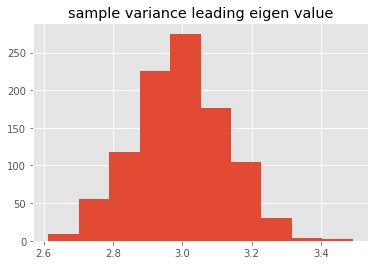

In [209]:
all_cov_leading_eigval =np.sort(np.linalg.eigvals(all_cov),)[:,1]
print("Mean of sample variance leading eigen value",np.mean(all_cov_leading_eigval))

plt.title("sample variance leading eigen value")
plt.hist(all_cov_leading_eigval)

plt.show()



실제값 3과 매우 유사함을 알 수 있다.

# 문제 3.

- T4-6.DAT 130명 페루 청소년 심리검사 결과
- 첫 5개 변수 : independence, support, benevolence, conformity, leadership

In [224]:
# 파일 불러오기
X = pd.DataFrame( np.loadtxt('../data/T4-6.DAT', unpack = True).T[:,:5],
                 columns=['independence','support','benevolence','conformity','leadership'] )
X

,independence,support,benevolence,conformity,leadership
0,27.0,13.0,14.0,20.0,11.0
1,12.0,13.0,24.0,25.0,6.0
2,14.0,20.0,15.0,16.0,7.0
3,18.0,20.0,17.0,12.0,6.0
4,9.0,22.0,22.0,21.0,6.0
...,...,...,...,...,...
125,10.0,11.0,26.0,17.0,10.0
126,14.0,12.0,14.0,11.0,29.0
127,19.0,11.0,23.0,18.0,13.0
128,27.0,19.0,22.0,7.0,9.0


## 3 - a).
- Q-Q PLOT marginal normality

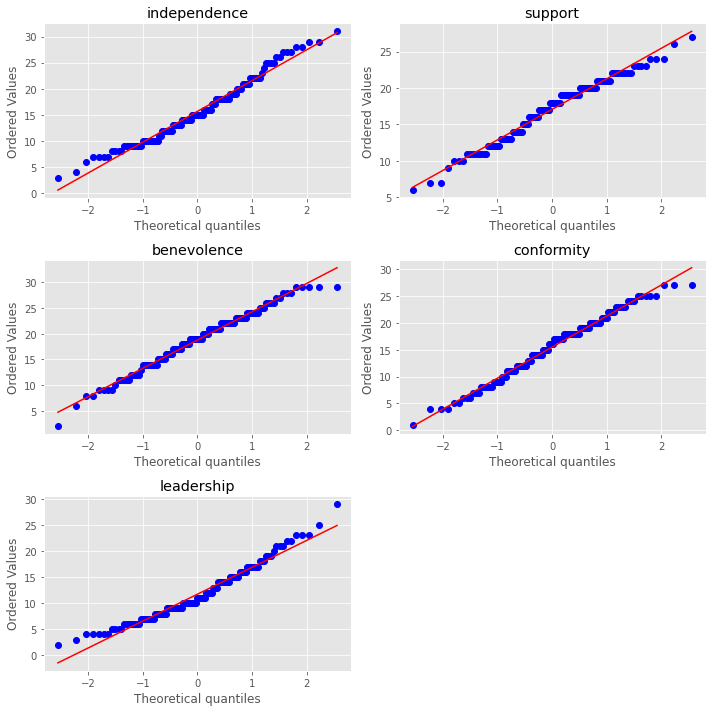

In [235]:

plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
stats.probplot(X['independence'],plot=plt)
plt.title('independence')

plt.subplot(3,2,2)
stats.probplot(X['support'],plot=plt)
plt.title('support')

plt.subplot(3,2,3)
stats.probplot(X['benevolence'],plot=plt)
plt.title('benevolence')

plt.subplot(3,2,4)
stats.probplot(X['conformity'],plot=plt)
plt.title('conformity')

plt.subplot(3,2,5)
stats.probplot(X['leadership'],plot=plt)
plt.title('leadership')

plt.tight_layout()

Indepence와 Leadership은 곡선형태로 관측된다.

Indepence와 Leadership은 정규성을 띄지않는다고 생각된다.

## 3 - b).
- Chi-square PLOT multivariate noramlity

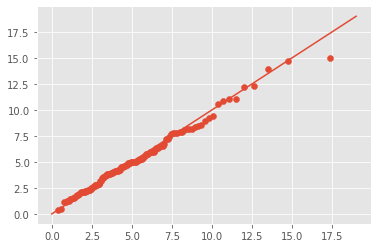

In [294]:
deviation_matrix=X-X.mean()
cov_matrix = deviation_matrix.cov().to_numpy()
invcov_matrix=np.linalg.inv(cov_matrix)

chisq_list =[]

for i in range(130):
    row_one=deviation_matrix.to_numpy()[i,:]
    chisq_list.append(row_one.T @ invcov_matrix @ row_one)

plt.scatter(scipy.stats.chi2.ppf((np.arange(1,131)-0.5)/130,df=5),
    np.sort(chisq_list))
plt.plot(np.arange(0,20))



multivariate Chi-square plot을 그려본 결과.

마지막 한 값이 아웃라이어가 존재한다.

그것을 제외하면, 정규성을 띄는것으로 관측된다.